In [1]:
import tomotopy as tp
import numpy as np
import pandas as pd
import re
import os
import time
import itertools
import konlpy
from kiwipiepy import Kiwi
from hanspell import spell_checker
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pyLDAvis


In [2]:
df=pd.read_csv('plus.csv',encoding='utf-8-sig',header=0, dtype={'score':np.str})
df.info()

C:\Users\jenny\AppData\Local\Temp/ipykernel_28460/811265187.py:1: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df=pd.read_csv('plus.csv',encoding='utf-8-sig',header=0, dtype={'score':np.str})


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3285 entries, 0 to 3284
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   review_title  3285 non-null   object 
 1   review        3285 non-null   object 
 2   score         3285 non-null   object 
 3   real_date     3285 non-null   object 
 4   year          3285 non-null   float64
 5   month         3285 non-null   float64
 6   type          2969 non-null   object 
 7   dataset       3219 non-null   object 
dtypes: float64(2), object(6)
memory usage: 205.4+ KB


In [3]:
df['type'].unique()

array([' 커플', nan, ' 가족', ' 비지니스', ' 개인', ' 친구'], dtype=object)

In [4]:
for i in range(len(df)):
    if df.iloc[i,6] in [' 친구',' 가족',' 커플']:
        df.iloc[i,6] = 'no_solo'
    elif df.iloc[i,6] in [' 비지니스', np.NaN]:
        df.iloc[i,6] = np.NaN
    elif df.iloc[i,6] in [' 개인']:
        df.iloc[i,6]='solo'

In [5]:
df['type'].unique()

array(['no_solo', nan, 'solo'], dtype=object)

In [6]:
df.dropna(subset=['type'], how='any', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2612 entries, 0 to 3283
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   review_title  2612 non-null   object 
 1   review        2612 non-null   object 
 2   score         2612 non-null   object 
 3   real_date     2612 non-null   object 
 4   year          2612 non-null   float64
 5   month         2612 non-null   float64
 6   type          2612 non-null   object 
 7   dataset       2555 non-null   object 
dtypes: float64(2), object(6)
memory usage: 183.7+ KB


In [7]:
df[df['dataset'].isnull()]

,review_title,review,score,real_date,year,month,type,dataset
4,"코레일 패스를 구입하지 않는, 거대한 돈 낭비!","돈에 대해 주의하지 않으면, 사 코레일 전달할 수 있습니다. 하지만 이 거대한 돈 ...",1,2015년 6월,2015.0,6.0,no_solo,NaN
26,부드러운 ktx 여행,부산 ktx가 하루를 계획하기 로 결정하고 2시간 40분 걸리는 소용돌이 가 서울역...,5,2016년 4월,2016.0,4.0,no_solo,NaN
54,빠른 장거리 교통수단!,"2004년 4월 세계 5번째로 개통된 고속철도로, 특히 종전의 고속철도 보유국들이 ...",4,2016년 11월,2016.0,11.0,solo,NaN
76,나쁘지 않음!,"일반적으로, 이 효과적으로 대중 교통. 주요 도시 에 sk 연결됩니다. 많은 현지 ...",4,2017년 7월,2017.0,7.0,no_solo,NaN
171,거대한 지하철 - 많이 걸어서 지하철에서!,"아마도 그 중 하나인 저는. 그러나, 이 이렇게 큰 경우는 곳이 4번 출구에서 2분...",4,2015년 1월,2015.0,1.0,no_solo,NaN
272,이 최고의 지하철 메트로 레일이 세상에서,"만약 서울, 타 지하철 메트로 지하철 환승할 모든 방문자는 가격의 서울을, 도 중 ...",5,2015년 3월,2015.0,3.0,no_solo,NaN
275,조방의 메트로,제 아내와 저는 (그리고 아내의 선배 오빠 총각) 서울 국제 공항 도착 2015년 ...,4,2015년 3월,2015.0,3.0,no_solo,NaN
341,경제적이고 간단한 방법은 서울 여행,저는 제가 최근 서울 지하철 을 이용한 여행을 하는 도시 안에 정기적으로. 가장 편...,4,2015년 4월,2015.0,4.0,no_solo,NaN
371,"쉽게 켜짐, 전체적으로 직관적이지",서울 지하철 지도를 다운로드하고 절반 이상 필요한 를즉시. 여러 가집니다 변경다른 ...,4,2015년 4월,2015.0,4.0,no_solo,NaN
432,가장 좋은 방법은 서울을!,이는 지금까지 가장 쉽고 편리하게 탐색할 수 있도록 서울. 돈을 얻을 수 있는 카드...,5,2015년 5월,2015.0,5.0,no_solo,NaN


In [8]:
df.dropna(subset=['dataset'], how='any', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2555 entries, 0 to 3283
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   review_title  2555 non-null   object 
 1   review        2555 non-null   object 
 2   score         2555 non-null   object 
 3   real_date     2555 non-null   object 
 4   year          2555 non-null   float64
 5   month         2555 non-null   float64
 6   type          2555 non-null   object 
 7   dataset       2555 non-null   object 
dtypes: float64(2), object(6)
memory usage: 179.6+ KB


In [9]:
#솔로/비솔로 데이터 구분
#솔로
condition = (df.type=='solo')
df2=df.loc[condition]

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783 entries, 11 to 3283
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   review_title  783 non-null    object 
 1   review        783 non-null    object 
 2   score         783 non-null    object 
 3   real_date     783 non-null    object 
 4   year          783 non-null    float64
 5   month         783 non-null    float64
 6   type          783 non-null    object 
 7   dataset       783 non-null    object 
dtypes: float64(2), object(6)
memory usage: 55.1+ KB


In [11]:
#응집도 계산 전 사용할 토크나이저 함수 정의

import konlpy
stop_list=['우리','함께','있습니다']
def tokenize_korean_text(text):
    text = re.sub(r'[^,.?!\w\s]','', text)
    
    okt = konlpy.tag.Okt()
    Okt_morphs = okt.pos(text)
    
    words = []
    for word, pos in Okt_morphs:
        if not pos == 'Josa' and not pos =='Punctuation' and not pos =='Foreign' and len(word) > 1 and word not in stop_list :
            words.append(word)
    ## word를 이어붙인 string 형태가 아닌 word의 list를 return해주는 게 sklearn lda 준비 과정과의 차이
            
    return words

In [12]:
#솔로 데이터 토큰화
tokenized_list_solo = []
a=df2['dataset'].values
for text in range(len(a)):
    tokenized_list_solo.append(tokenize_korean_text(a[text]))

In [13]:
#솔로
model = tp.DMRModel(k=20, alpha=0.1, eta=0.01, min_cf=5,rm_top=3,tw=tp.TermWeight.IDF)

key=df2['score'].values
value=tokenized_list_solo


for pairs in zip(key, value):
    try :
        model.add_doc(pairs[1],metadata=pairs[0]) # tokenize함수를 이용해 전처리한 결과를 add_doc에 넣습니다.
    except RuntimeError :
        pass
        
               
model.train(0)
print('Total docs:', len(model.docs))
print('Total words:', model.num_words)
print('Vocab size:', model.num_vocabs)
 

Total docs: 783
Total words: 15990
Vocab size: 703


In [28]:
model.summary()

<Basic Info>
| DMRModel (current version: 0.12.2)
| 783 docs, 14331 words
| Total Vocabs: 4048, Used Vocabs: 433
| Entropy of words: 5.58827
| Entropy of term-weighted words: 5.86703
| Removed Vocabs: 지하철 서울 있는
| Metadata of docs and its distribution
|  4: 217
|  5: 516
|  3: 43
|  2: 4
|  1: 3
|
<Training Info>
| Iterations: 0, Burn-in steps: 0
| Optimization Interval: 10
| Log-likelihood per word: -9.03367
|
<Initial Parameters>
| tw: TermWeight.IDF
| min_cf: 9 (minimum collection frequency of words)
| min_df: 0 (minimum document frequency of words)
| rm_top: 3 (the number of top words to be removed)
| k: 20 (the number of topics between 1 ~ 32767)
| alpha: [0.1] (an initial value of exponential of mean of normal distribution for `lambdas`, given as a single `float` in case of symmetric prior and as a list with length `k` of `float` in case of asymmetric prior.)
| eta: 0.01 (hyperparameter of Dirichlet distribution for topic - word)
| sigma: 1.0 (standard deviation of normal distribu

==== Coherence : c ====
Average: 0.3907916985847987 
Per Topic: [0.435243783146143, 0.40090397372841835, 0.5063768543303013, 0.35076022511348126, 0.3933244485408068, 0.29624365461058916, 0.40062086302787064, 0.3984170688316226, 0.29883817145600916, 0.29694090522825717, 0.3998746171593666, 0.378838150203228, 0.29073576629161835, 0.3175566032528877, 0.34106134474277494, 0.4732958018779755, 0.4433663472533226, 0.302250250428915, 0.48884204141795634, 0.60234310105443]


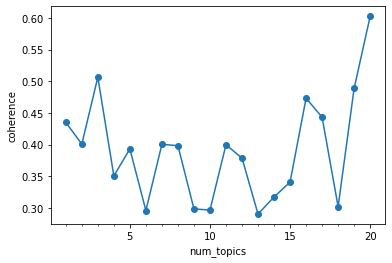

In [14]:
# calculate coherence using preset
ax=plt.axes()
coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]
print('==== Coherence : c ====')
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
x=range(1,21,1)
plt.plot(x, coherence_per_topic,marker='o')
plt.xlabel("num_topics")
plt.ylabel("coherence")
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.show()
print()

위 결과에서 14개일 때 가장 높은 응집도를 보였기 때문에 토픽을 14개로 설정하였다.

In [30]:
#토픽수 정하고 솔로 분석
model = tp.DMRModel(k=5, alpha=0.1, eta=0.01, min_cf=9,rm_top=3,tw=tp.TermWeight.IDF)

key=df2['score'].values
value=tokenized_list_solo

for pairs in zip(key, value):
    try :
        model.add_doc(pairs[1],metadata=pairs[0]) # tokenize함수를 이용해 전처리한 결과를 add_doc에 넣습니다.
    except RuntimeError :
        pass

model.train(0)
print('Total docs:', len(model.docs))
print('Total words:', model.num_words)
print('Vocab size:', model.num_vocabs)
 
 
 
for i in range(200):
    model.train(1)
    
for i in range(model.k):
    res = model.get_topic_words(i, top_n=10)
    print('Topic #{}'.format(i), end='\t')
    print(', '.join(w for w, p in res))

Total docs: 783
Total words: 14331
Vocab size: 433
Topic #0	영어, 사용, 여행, 카드, 방법, 쉽게, 티켓, 좋은, 시스템, 효율
Topic #1	이용, 시간, 수단, 교통, 환승, 호선, 노선, 입니다, 출퇴근, 버스
Topic #2	하지, 하는, 출구, 지하철역, 매우, 표시, 방향, 번호, 때문, 쉽게
Topic #3	KTX, 국가, 생각, 상당히, 특히, 매일, 수도, 대중교통, 수단, 빠르고
Topic #4	최고, 우리나라, 세계, 나라, 한국, 되고, 일본, 깨끗한, 수준, 유럽


In [31]:
model.summary()

<Basic Info>
| DMRModel (current version: 0.12.2)
| 783 docs, 14331 words
| Total Vocabs: 4048, Used Vocabs: 433
| Entropy of words: 5.58827
| Entropy of term-weighted words: 5.86703
| Removed Vocabs: 지하철 서울 있는
| Metadata of docs and its distribution
|  4: 217
|  5: 516
|  3: 43
|  2: 4
|  1: 3
|
<Training Info>
| Iterations: 200, Burn-in steps: 0
| Optimization Interval: 10
| Log-likelihood per word: -5.85920
|
<Initial Parameters>
| tw: TermWeight.IDF
| min_cf: 9 (minimum collection frequency of words)
| min_df: 0 (minimum document frequency of words)
| rm_top: 3 (the number of top words to be removed)
| k: 5 (the number of topics between 1 ~ 32767)
| alpha: [0.1] (an initial value of exponential of mean of normal distribution for `lambdas`, given as a single `float` in case of symmetric prior and as a list with length `k` of `float` in case of asymmetric prior.)
| eta: 0.01 (hyperparameter of Dirichlet distribution for topic - word)
| sigma: 1.0 (standard deviation of normal distrib

In [32]:
#솔로 감성점수 계산
print('Topic distributions by score, solo')

df4=pd.DataFrame()
score_labels=['1','2','3','4','5']

for i in score_labels:
    df4[i+'score']=model.get_topic_prior(i)
df4['total']=df4.sum(axis=1)

total_sum=df4['total'].values
gamsung_sum=0
gamsung_list=[]

for i in range(model.k):
    a=df4.iloc[i,:-1].values
    gamsung_sum=(a[0]*1+a[1]*2+a[2]*3+a[3]*4+a[4]*5)/total_sum[i]
    gamsung_list.append(gamsung_sum)
    
df4['re_score']=gamsung_list
df4.head(20)

Topic distributions by score, solo


,1score,2score,3score,4score,5score,total,re_score
0,0.100550,0.109857,0.024370,0.063047,0.172038,0.469862,3.204666
1,0.186370,0.067840,0.193263,0.111181,0.506690,1.065345,3.642027
2,0.206358,0.125056,0.189487,0.142612,0.293180,0.956694,3.199856
3,0.122551,0.173621,0.081438,0.040703,0.027765,0.446078,2.277051
4,0.069572,0.157273,0.014369,0.081610,0.078054,0.400878,2.853572


In [33]:
#각 토픽 별 상위 10개 단어 추출
word_list=[]
for i in range(model.k):
    a=model.get_topic_words(i, top_n=10)
    word_list.append([x[0] for x in a])

df4['word_list']=word_list
df4.head(15)

,1score,2score,3score,4score,5score,total,re_score,word_list
0,0.100550,0.109857,0.024370,0.063047,0.172038,0.469862,3.204666,"[영어, 사용, 여행, 카드, 방법, 쉽게, 티켓, 좋은, 시스템, 효율]"
1,0.186370,0.067840,0.193263,0.111181,0.506690,1.065345,3.642027,"[이용, 시간, 수단, 교통, 환승, 호선, 노선, 입니다, 출퇴근, 버스]"
2,0.206358,0.125056,0.189487,0.142612,0.293180,0.956694,3.199856,"[하지, 하는, 출구, 지하철역, 매우, 표시, 방향, 번호, 때문, 쉽게]"
3,0.122551,0.173621,0.081438,0.040703,0.027765,0.446078,2.277051,"[KTX, 국가, 생각, 상당히, 특히, 매일, 수도, 대중교통, 수단, 빠르고]"
4,0.069572,0.157273,0.014369,0.081610,0.078054,0.400878,2.853572,"[최고, 우리나라, 세계, 나라, 한국, 되고, 일본, 깨끗한, 수준, 유럽]"


In [34]:
 # extract candidates for auto topic labeling
extractor = tp.label.PMIExtractor(min_cf=5, min_df=5, max_len=5, max_cand=10000, normalized=True)
cands = extractor.extract(model)

labeler = tp.label.FoRelevance(model, cands, min_df=5, smoothing=1e-2, mu=0.25)
for k in range(model.k):
    print("== Topic #{} ==".format(k))
    print("Labels:", ', '.join(label for label, score in labeler.get_topic_labels(k, top_n=5)))
    for word, prob in model.get_topic_words(k, top_n=10):
        print(word, prob, sep='\t')
    print()

== Topic #0 ==
Labels: 또는, 방법, 구입, 카드, 사용
영어	0.02196464315056801
사용	0.020821290090680122
여행	0.017638985067605972
카드	0.017520837485790253
방법	0.017348337918519974
쉽게	0.01556224375963211
티켓	0.014381155371665955
좋은	0.014232016168534756
시스템	0.014111412689089775
효율	0.0139526491984725

== Topic #1 ==
Labels: 환승, 이용, 노선, 출퇴근, 수단
이용	0.01918547786772251
시간	0.01762501522898674
수단	0.016906725242733955
교통	0.01662982627749443
환승	0.014552174136042595
호선	0.014076512306928635
노선	0.012376319617033005
입니다	0.012129394337534904
출퇴근	0.011924498714506626
버스	0.010941359214484692

== Topic #2 ==
Labels: 하지, 않는, 경우, 지하철역, 지도
하지	0.019893955439329147
하는	0.019204040989279747
출구	0.016645120456814766
지하철역	0.016330059617757797
매우	0.014904879964888096
표시	0.01487448625266552
방향	0.014098062179982662
번호	0.013987605459988117
때문	0.013710913248360157
쉽게	0.013155775144696236

== Topic #3 ==
Labels: KTX, 라면, 국가, 상당히, 특히
KTX	0.1296987235546112
국가	0.09089649468660355
생각	0.08258169144392014
상당히	0.06762601435184479
특히	0.058498073

In [35]:
#빈도 구하기 전
df5=pd.DataFrame()
df5['docs']=tokenized_list_solo
df5['score']=df2['score'].values
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   docs    783 non-null    object
 1   score   783 non-null    object
dtypes: object(2)
memory usage: 12.4+ KB


In [36]:
#빈도 구하기

topic_num=[]
temp1=[] #토픽번호
temp2=[] #분포율
for i in range(len(model.docs)):
    a=model.docs[i].get_topics()
    temp1.append([x[0] for x in a])
    temp2.append([x[1] for x in a])
for i in range(len(temp1)):
    if temp2[i][0] >= 0.5:
        topic_num.append(temp1[i][0])
    else :
        topic_num.append(np.NaN)
df5['topic_num']=topic_num
df5[df5['topic_num'].isnull()]

,docs,score,topic_num
3,"[서울, 부산한, 연결, 2.5, 시간, 걸리는, 서울, 부산, 고속, 열차, 있는...",5,NaN
6,"[쉬운, 여행, 효율, 교육, 무료, 무선, 인터넷, 내장, 필요한, 주는, 신용,...",4,NaN
11,"[좋아요, 좋아, 일본, 신칸센, 싸고, 버스, 빠르고, 비행기, 수속, 탑승, 등...",5,NaN
13,"[개인, 방문, KTX, free, wi, fi, 너무나, 좋았습니다, 다만, 오갈...",3,NaN
14,"[탑승, 종종, 지연, 사고, 소식, 있지만, KTX, 우리나라, 교통, 수단, 가...",4,NaN
...,...,...,...
729,"[세계, 깨끗한, 뉴욕, 지하철, 있으면, 이해, 한국, 지하철, 정말, 깔끔하고,...",4,NaN
748,"[매일, 이용, 세계, 최고, 대중교통, 여러, 국가, 여행, 다녀, 봐도, 이런,...",5,NaN
763,"[친구, 생일, 파티, 오늘, 역시, 만족합니다, 부설, 임영철, 오늘, 레시피, ...",5,NaN
777,"[한국, 오는, 외국인, 메트로, 감동, 서울, 메트로, 세계, 수준, 자랑, 한다...",5,NaN


In [37]:
df6=df5.groupby(['topic_num','score'])['docs']
print(df6.size().reset_index(name='counts'))

    topic_num score  counts
0         0.0     3       3
1         0.0     4      59
2         0.0     5     158
3         1.0     1       2
4         1.0     2       2
5         1.0     3      25
6         1.0     4     102
7         1.0     5     173
8         2.0     2       2
9         2.0     3       4
10        2.0     4      12
11        2.0     5      50
12        3.0     5       1
13        4.0     3       1
14        4.0     4       7
15        4.0     5      39
